<a href="https://colab.research.google.com/github/gapigo/theras-frontend/blob/price-Modelo_1/Anlises_tecnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
#pegando os dados do yfinance
empresa = 'petr4.SA' 
acao = yf.Ticker(empresa)
historico = acao.history(period = 'max', interval='1wk')
historico

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-02:00,1.872027,1.872027,1.744570,1.752536,162252800000,0.0,0.0
2000-01-10 00:00:00-02:00,1.788543,1.788543,1.696774,1.720672,109893120000,0.0,0.0
2000-01-17 00:00:00-02:00,1.700916,1.708882,1.656943,1.656943,117163520000,0.0,0.0
2000-01-24 00:00:00-02:00,1.645154,1.664909,1.645154,1.653120,100577280000,0.0,0.0
2000-01-31 00:00:00-02:00,1.625398,1.780577,1.625398,1.780577,117360640000,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-13 00:00:00-03:00,24.549999,24.860001,22.799999,23.510000,371554700,0.0,0.0
2023-03-20 00:00:00-03:00,23.510000,23.670000,22.480000,22.790001,274670000,0.0,0.0
2023-03-27 00:00:00-03:00,23.110001,24.280001,22.830000,23.450001,233053100,0.0,0.0


In [ ]:
len(historico)

1215

In [ ]:
#queremos somente os dados de fechamento do dia, então vamos salvar um dataframe so com esses dados
historico_fe = historico['Close'].to_list() #converter os dados em uma lista para tratamento

In [ ]:
#vamos separar os dados em conjuntos para analises e calculos, esses conjuntos são moveis
quant_dados_entrada = 100
#vamos criar duas lista uma de dados de entrada e outra de dados de saida
entrada = list()
y = list()
#vamos criar um sistema que vai retirar uma certa quantidade de dados e inserir nas respectivas listas
for i in range(quant_dados_entrada, len(historico_fe)):
    entrada.append(historico_fe[i - quant_dados_entrada: i])
    y.append(historico_fe[i])

In [ ]:
len(entrada)

1201

indice de força relativa: é um indicador de análise técnica que ajuda a medir a força de uma tendência, comparando os ganhos recentes e as perdas recentes em um determinado mercado.

In [ ]:
#aqui vamos iniciar calculos e analises do indice de força relativa
lista_de_rsi = [] #essa lista vai armazenar o valor do nosso indice
for array in entrada: #vamos varrer o vetor e entrar nos (vetor)conjuntos
  lista_pst = [] #esta lista armazena os valores positivos da media de valores positivos
  lista_ngt = [] #esta lista armazena os valores negativos da media de valores negativos
  
  for a in range(0, len(array)-1): #para cada conjunto em nosso vetor
    valores = array[a + 1] - array[a] #vamos subtrair o valor do indice a frente com o valor do indice anterior isso para todo o conjunto
   
    if valores < 0:
      lista_ngt.append(valores) #atribuimos então a lista de valores negativos
    elif valores > 0:
      lista_pst.append(valores) #atribuimos então a lista de valores positivos
    else:
      continue #ignorado caso seja 0
  
  media_pst = 0
  for valor in lista_pst: #vamos somar todos os valores positivos
    media_pst+=valor
  
  media_ngt = 0
  for valor in lista_ngt: #vamos somar todos os valores negativos
    media_ngt+=valor

  media_pst = media_pst/quant_dados_entrada #agora tiramos a media positiva
  media_ngt = (media_ngt/quant_dados_entrada)*-1 #agora tiramos a media negativa e multiplicamos por -1 para que seja positivo
  
  rs = media_pst / media_ngt #dividimos a media positiva com a media negativa
  
  rsi = 100 - (100 / (1 + rs)) #calculamos o indice
  lista_de_rsi.append(rsi) #atribuimos a lista 

In [ ]:
#indice de força relativa
"""lista_pst = []
lista_ngt = []

for a in range(0, len(b[0])-1):
  valores = b[0][a + 1] - b[0][a]
  if valores < 0:
    lista_ngt.append(valores)
  elif valores > 0:
    lista_pst.append(valores)
  else:
    continue"""

'lista_pst = []\nlista_ngt = []\n\nfor a in range(0, len(b[0])-1):\n  valores = b[0][a + 1] - b[0][a]\n  if valores < 0:\n    lista_ngt.append(valores)\n  elif valores > 0:\n    lista_pst.append(valores)\n  else:\n    continue'

In [ ]:
"""media_pst = 0
for valor in lista_pst:
  media_pst+=valor"""


'media_pst = 0\nfor valor in lista_pst:\n  media_pst+=valor'

In [ ]:
"""media_ngt = 0
for valor in lista_ngt:
  media_ngt+=valor"""

'media_ngt = 0\nfor valor in lista_ngt:\n  media_ngt+=valor'

In [ ]:
"""media_pst = media_pst/len(lista_pst)
media_ngt = media_ngt/len(lista_pst)*-1
rs = media_pst / media_ngt
rsi =100 - (100 / (1 + media_pst / media_ngt))
media_pst, media_ngt, rs, rsi"""



'media_pst = media_pst/len(lista_pst)\nmedia_ngt = media_ngt/len(lista_pst)*-1\nrs = media_pst / media_ngt\nrsi =100 - (100 / (1 + media_pst / media_ngt))\nmedia_pst, media_ngt, rs, rsi'

In [ ]:
#vamos transformar os nossos valores de entrada em uma matriz para facilitar na criação de um dataframe
x = np.array(entrada)

In [ ]:
#criamos o dataframe
df_x = pd.DataFrame(x)
#df_x = df_x.T
df_x


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.752536,1.720672,1.656943,1.653120,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729,1.868204,1.852272,1.879994,1.971763
1,1.720672,1.656943,1.653120,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729,1.868204,1.852272,1.879994,1.971763,1.879994
2,1.656943,1.653120,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729,1.868204,1.852272,1.879994,1.971763,1.879994,1.625080
3,1.653120,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729,1.868204,1.852272,1.879994,1.971763,1.879994,1.625080,1.713024
4,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729,1.868204,1.852272,1.879994,1.971763,1.879994,1.625080,1.713024,1.748713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,24.709999,22.049999,25.120001,24.500000,23.740000,24.570000,26.370001,25.620001,24.790001,26.719999,26.440001,25.900000,25.700001,24.980000
1197,22.049999,25.120001,24.500000,23.740000,24.570000,26.370001,25.620001,24.790001,26.719999,26.440001,25.900000,25.700001,24.980000,23.510000
1198,25.120001,24.500000,23.740000,24.570000,26.370001,25.620001,24.790001,26.719999,26.440001,25.900000,25.700001,24.980000,23.510000,22.790001
1199,24.500000,23.740000,24.570000,26.370001,25.620001,24.790001,26.719999,26.440001,25.900000,25.700001,24.980000,23.510000,22.790001,23.450001


In [ ]:
#df_x.to_excel('teste.xlsx')

Média móvel: é um indicador financeiro que ajuda a suavizar a volatilidade dos preços de uma ação, um ativo ou qualquer outro tipo de dado financeiro. 

In [ ]:
#calculamos a media movel e criamos um dataframe
media_movel = pd.DataFrame(df_x.mean(axis=1), columns = ['media movel'])

In [ ]:
media_movel

,media movel
0,1.811827
1,1.820931
2,1.814103
3,1.818109
4,1.824937
...,...
1196,25.086429
1197,25.000714
1198,25.053572
1199,24.934286


In [ ]:
#criamos um dataframe de indice de força relativa
ind_forc_relat = pd.DataFrame(lista_de_rsi, columns = ['Ind-forc-relat'])

In [ ]:
#criamos um dataframe com os calores de y (saida)
df_y = pd.DataFrame(y,columns = ['y'])

In [ ]:
df_y

,y
0,1.879994
1,1.625080
2,1.713024
3,1.748713
4,1.690720
...,...
1196,23.510000
1197,22.790001
1198,23.450001
1199,24.000000


In [ ]:
ind_forc_relat

,Ind-forc-relat
0,62.684414
1,58.620671
2,48.571456
3,52.497341
4,48.561554
...,...
1196,50.900602
1197,55.289858
1198,39.825327
1199,45.430812


<function matplotlib.pyplot.show(close=None, block=None)>

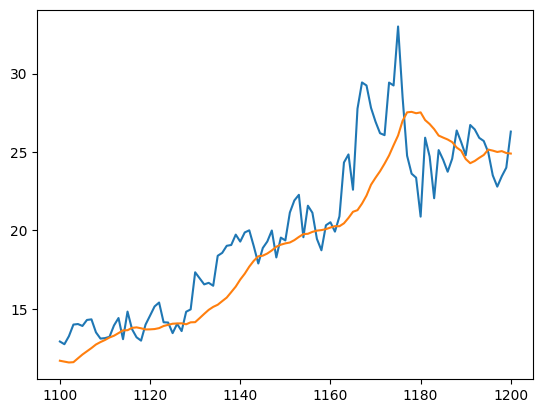

In [ ]:
plt.plot(df_y[1100:])
plt.plot(media_movel[1100:])
#plt.plot(ind_forc_relat[1100:])

plt.show

vamos trabalhar com as bandas de bollinger

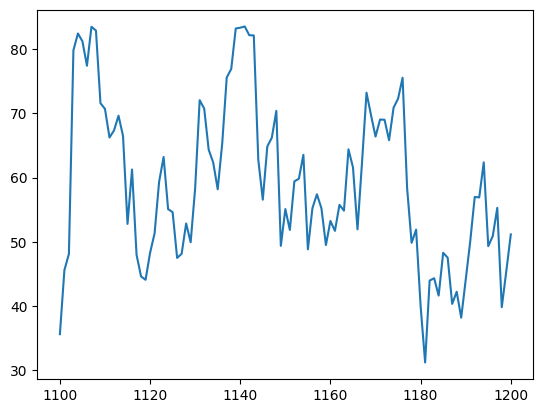

In [ ]:
plt.plot(ind_forc_relat[1100:])
plt.show()

calculo de desvio padrão

Desvio padrão: é uma medida estatística que indica o quanto os dados se desviam da média.

In [ ]:
#vamos trabalhar agora com o desvio padrão para calcular as bandas de 6bollinger
lista_desvio_padrao = list()
for cont, array in enumerate(entrada): #vamos varrer o vetor e entrar nos (vetor)conjuntos
  lista_quad_dif = list()
  lista_dif = list() #esta lista armazena os valores da diferença do elemento da frente e o anterior

  for a in range(0, len(array)-1): #para cada conjunto em nosso vetor
    valores = array[a] - media_movel['media movel'][cont] #vamos subtrair o valor do indice a frente com o valor do indice anterior isso para todo o conjunto
    lista_dif.append(valores)
  for valor in lista_dif:
    lista_quad_dif.append(valor**2)
  soma_quad_dif = 0
  for valor in lista_quad_dif:
    soma_quad_dif += valor
  media_soma_quad_dif = soma_quad_dif/(quant_dados_entrada-1)
  desvio_padrao = math.sqrt(media_soma_quad_dif)
  lista_desvio_padrao.append(desvio_padrao)

calculo de bandas de bollinger

Banda Superior de Bollinger = media movel de tempo + (2 x desvio padrão)

Banda Inferior de Bollinger = media movel de tempo - (2 x desvio padrão)

As bandas de Bollinger são um indicador de análise técnica usado para avaliar a volatilidade do preço de um ativo em relação a um período de tempo específico. 

In [ ]:
lista_banda_sup_boll = list()
lista_banda_inf_boll = list()
for cont, valor in enumerate(lista_desvio_padrao):
  lista_banda_sup_boll.append(media_movel['media movel'][cont] + (valor * 2))
  lista_banda_inf_boll.append(media_movel['media movel'][cont] - (valor * 2))

In [ ]:
banda_sup_boll = pd.DataFrame(lista_banda_sup_boll, columns = ['banda sup boll'])


In [ ]:
banda_inf_boll = pd.DataFrame(lista_banda_inf_boll, columns = ['banda inf boll'])

<function matplotlib.pyplot.show(close=None, block=None)>

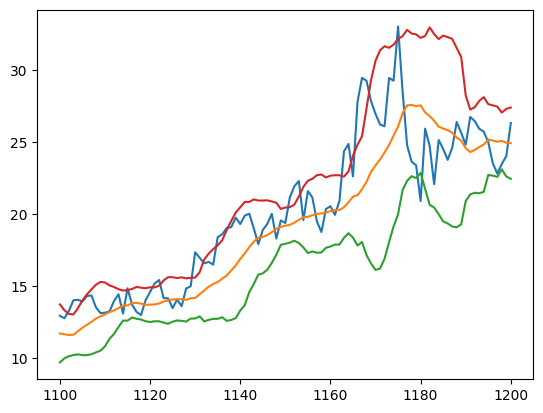

In [ ]:
plt.plot(df_y[1100:])
plt.plot(media_movel[1100:])
plt.plot(banda_inf_boll[1100:])
plt.plot(banda_sup_boll[1100:])
#plt.plot(ind_forc_relat[1100:])

plt.show

O MACD (Moving Average Convergence Divergence) é um indicador técnico utilizado para identificar mudanças na tendência de um ativo financeiro. Ele é calculado subtraindo a média móvel exponencial de curto prazo (EMA) da média móvel exponencial de longo prazo (EMA).

EMA(curto prazo) = (Preço de fechamento - EMA(curto prazo anterior)) x (2 / (N + 1)) + EMA(curto prazo anterior),

In [ ]:
#vamos separar os dados em conjuntos para analises e calculos, esses conjuntos são moveis
quant_dados_curto_prazo = round(quant_dados_entrada*0.46) #vou definir o tamanho

'''
#vamos criar duas lista uma de dados de entrada e outra de dados de saida
valores_curto_prazo = list()
#y = list()
#vamos criar um sistema que vai retirar uma certa quantidade de dados e inserir nas respectivas listas
for i in range(quant_dados_curto_prazo, len(historico_fe)):
    valores_curto_prazo.append(historico_fe[i - quant_dados_curto_prazo: i])
    #y.append(historico_fe[i])
  '''  


         0         1         2         3         4         5         6   \
0  1.752536  1.720672  1.656943  1.653120  1.780577  1.684985  1.772611   
1  1.720672  1.656943  1.653120  1.780577  1.684985  1.772611  1.868204   
2  1.656943  1.653120  1.780577  1.684985  1.772611  1.868204  1.923966   
3  1.653120  1.780577  1.684985  1.772611  1.868204  1.923966  1.979729   
4  1.780577  1.684985  1.772611  1.868204  1.923966  1.979729  1.868204   
5  1.684985  1.772611  1.868204  1.923966  1.979729  1.868204  1.852272   

         7         8         9         10        11        12        13  
0  1.868204  1.923966  1.979729  1.868204  1.852272  1.879994  1.971763  
1  1.923966  1.979729  1.868204  1.852272  1.879994  1.971763  1.879994  
2  1.979729  1.868204  1.852272  1.879994  1.971763  1.879994  1.625080  
3  1.868204  1.852272  1.879994  1.971763  1.879994  1.625080  1.713024  
4  1.852272  1.879994  1.971763  1.879994  1.625080  1.713024  1.748713  
5  1.879994  1.971763  1.87999

'\n#vamos criar duas lista uma de dados de entrada e outra de dados de saida\nvalores_curto_prazo = list()\n#y = list()\n#vamos criar um sistema que vai retirar uma certa quantidade de dados e inserir nas respectivas listas\nfor i in range(quant_dados_curto_prazo, len(historico_fe)):\n    valores_curto_prazo.append(historico_fe[i - quant_dados_curto_prazo: i])\n    #y.append(historico_fe[i])\n  '

In [ ]:
#vamos criar um dataframe com valores de curto prazo para poder calcular o MCA
df_curto_prazo = pd.DataFrame()
for a in range(0,quant_dados_curto_prazo):
  df_curto_prazo.insert(a,a,df_x[a])
#vamos calcular a ema de curto prazo
df_media_curto_prazo= pd.DataFrame(df_curto_prazo.mean(axis=1),columns = ['media'])

In [ ]:
df_curto_prazo

,0,1,2,3,4,5
0,1.752536,1.720672,1.656943,1.653120,1.780577,1.684985
1,1.720672,1.656943,1.653120,1.780577,1.684985,1.772611
2,1.656943,1.653120,1.780577,1.684985,1.772611,1.868204
3,1.653120,1.780577,1.684985,1.772611,1.868204,1.923966
4,1.780577,1.684985,1.772611,1.868204,1.923966,1.979729
...,...,...,...,...,...,...
1196,24.709999,22.049999,25.120001,24.500000,23.740000,24.570000
1197,22.049999,25.120001,24.500000,23.740000,24.570000,26.370001
1198,25.120001,24.500000,23.740000,24.570000,26.370001,25.620001
1199,24.500000,23.740000,24.570000,26.370001,25.620001,24.790001


In [ ]:
df_media_curto_prazo

,media
0,1.708139
1,1.711485
2,1.736073
3,1.780577
4,1.835012
...,...
1196,24.115000
1197,24.391667
1198,24.986667
1199,24.931667


In [ ]:
#vamos calcular a ema baseado no preço de fechamento
#EMA(curto prazo) = (Preço de fechamento - EMA(curto prazo anterior)) x (2 / (N + 1)) + EMA(curto prazo anterior)

ema_curto_prazo_fechamento = (df_x[quant_dados_curto_prazo] - df_media_curto_prazo['media']) * (2 / (quant_dados_curto_prazo + 1)) + df_media_curto_prazo['media']

In [ ]:
ema_curto_prazo_fechamento

0        1.726559
1        1.756261
2        1.789757
3        1.837478
4        1.844495
          ...    
1196    24.759286
1197    24.742619
1198    24.930477
1199    25.442619
1200    25.626905
Length: 1201, dtype: float64

In [ ]:
#agora vamos calcular a ema de longo prazo, como eu desejo prever o proximo valor, devo fazer uma media movel de N valores -1 
df_longo_prazo = df_x.drop([quant_dados_entrada-1], axis=1)
df_media_longo_prazo = pd.DataFrame(df_longo_prazo.mean(axis=1), columns=['media'])
#vamos calcular a ema baseado no preço de fechamento
#EMA(longo_prazo) = (Preço de fechamento - EMA(longo_prazo anterior)) x (2 / (N + 1)) + EMA(longo_prazo anterior)

ema_longo_prazo_fechamento = (df_x[quant_dados_entrada-1] - df_media_longo_prazo['media']) * (2 / (quant_dados_entrada + 1)) + df_media_longo_prazo['media']

In [ ]:
#vamos calcular o MACD = EMA de curto prazo - EMA de longo prazo. 
df_macd =  ema_curto_prazo_fechamento - ema_longo_prazo_fechamento

In [ ]:
df_macd

0      -0.095930
1      -0.068607
2      -0.011744
3       0.026375
4       0.024640
          ...   
1196   -0.320048
1197   -0.158714
1198    0.027810
1199    0.607285
1200    0.788238
Length: 1201, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

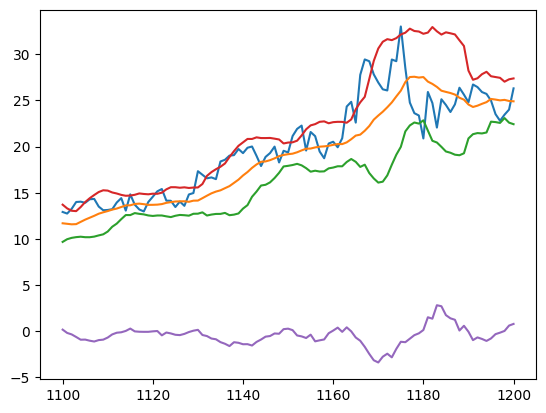

In [ ]:
plt.plot(df_y[1100:])
plt.plot(media_movel[1100:])
plt.plot(banda_inf_boll[1100:])
plt.plot(banda_sup_boll[1100:])
plt.plot(df_macd[1100:])
#plt.plot(df_ema_curt_praz[1100:])
#plt.plot(ind_forc_relat[1100:])

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

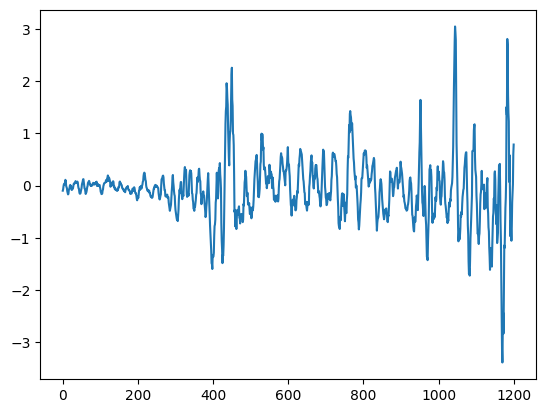

In [ ]:
plt.plot(df_macd)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

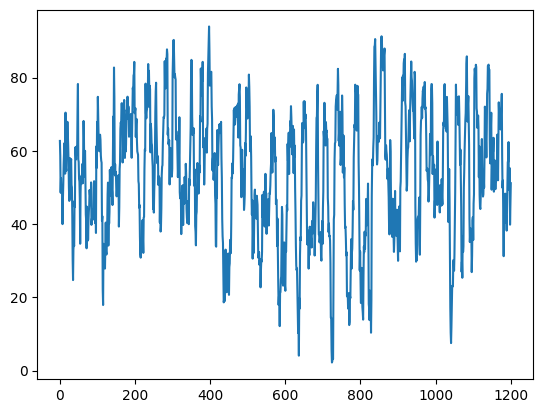

In [ ]:
plt.plot(ind_forc_relat)
plt.show

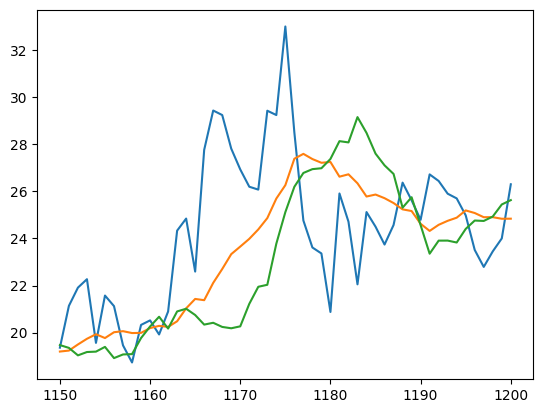

In [ ]:
#Quando as médias divergem e se cruzam, dão um sinal de compra ou de venda, 
#mostrando que o mercado está tendendo a mudar de direção: Sinal de Compra:
# a MME mais curta cruza para cima da MME mais longa. Sinal de Venda: a MME mais curta cruza para baixo da MME mais longa.
plt.plot(df_y[1150:])
#plt.plot(media_movel[1150:])
#plt.plot(banda_inf_boll[1150:])
#plt.plot(banda_sup_boll[1150:])
plt.plot(ema_longo_prazo_fechamento[1150:])
plt.plot(ema_curto_prazo_fechamento[1150:])
#plt.plot(ind_forc_relat[1150:][1150:])

plt.show()